# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [162]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [163]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
base_units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
notfound_count = 0

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "?appid=" + weather_api_key + "&units=" + base_units + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        notfound_count += 1 
        print("\t\tCity not found. Skipping... ", notfound_count)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marka
Processing Record 2 of Set 1 | ugoofaaru
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | la'ie
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | serenje
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | phillip island
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | aswan
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | beloyarskiy
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | puerto natales
Pro

In [164]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [165]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marka,1.7159,44.7717,26.93,88,97,5.35,SO,1698172787
1,ugoofaaru,5.6667,73.0000,27.47,78,22,3.71,MV,1698172787
2,iqaluit,63.7506,-68.5145,-0.15,80,75,3.60,CA,1698172788
3,la'ie,21.6477,-157.9253,28.92,82,9,0.89,US,1698172788
4,port-aux-francais,-49.3500,70.2167,4.58,90,100,11.96,TF,1698172788


In [166]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [167]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marka,1.7159,44.7717,26.93,88,97,5.35,SO,1698172787
1,ugoofaaru,5.6667,73.0000,27.47,78,22,3.71,MV,1698172787
2,iqaluit,63.7506,-68.5145,-0.15,80,75,3.60,CA,1698172788
3,la'ie,21.6477,-157.9253,28.92,82,9,0.89,US,1698172788
4,port-aux-francais,-49.3500,70.2167,4.58,90,100,11.96,TF,1698172788


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [168]:
# Date conversion 
dt_epoch = city_data_df.loc[0, 'Date']
ymd = time.localtime(dt_epoch)

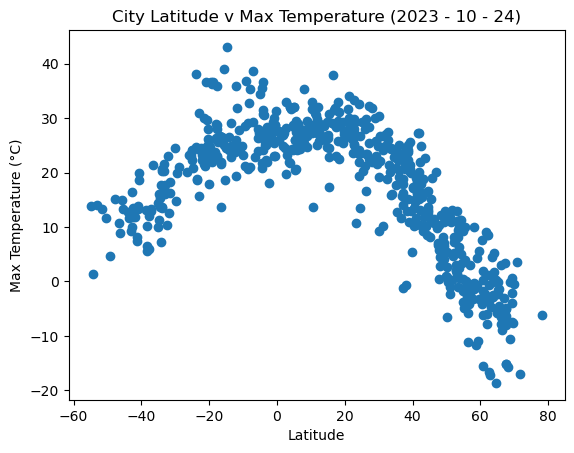

In [169]:
# Build scatter plot for latitude vs. temperature
fig, lat_temp = plt.subplots()
lat_temp.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
lat_temp.set_xlabel('Latitude')
lat_temp.set_ylabel('Max Temperature (°C)')
lat_temp.set_title(f'City Latitude v Max Temperature ({ymd.tm_year} - {ymd.tm_mon} - {ymd.tm_mday})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

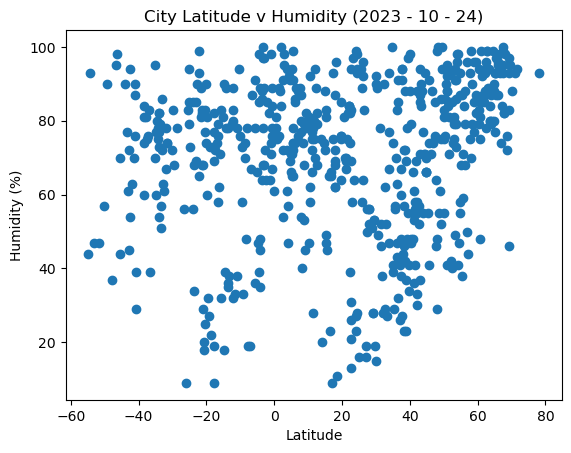

In [170]:
# Build the scatter plots for latitude vs. humidity
fig, lat_humid = plt.subplots()
lat_humid.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
lat_humid.set_xlabel('Latitude')
lat_humid.set_ylabel('Humidity (%)')
lat_humid.set_title(f'City Latitude v Humidity ({ymd.tm_year} - {ymd.tm_mon} - {ymd.tm_mday})') 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

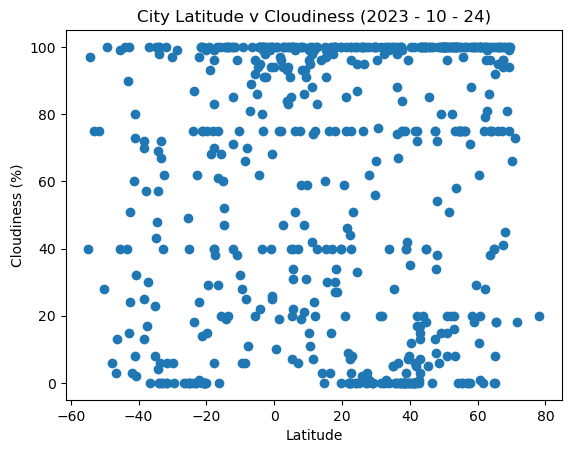

In [171]:
# Build the scatter plots for latitude vs. cloudiness
fig, lat_cloud = plt.subplots()
lat_cloud.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
lat_cloud.set_xlabel('Latitude')
lat_cloud.set_ylabel('Cloudiness (%)')
lat_cloud.set_title(f'City Latitude v Cloudiness ({ymd.tm_year} - {ymd.tm_mon} - {ymd.tm_mday})') 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

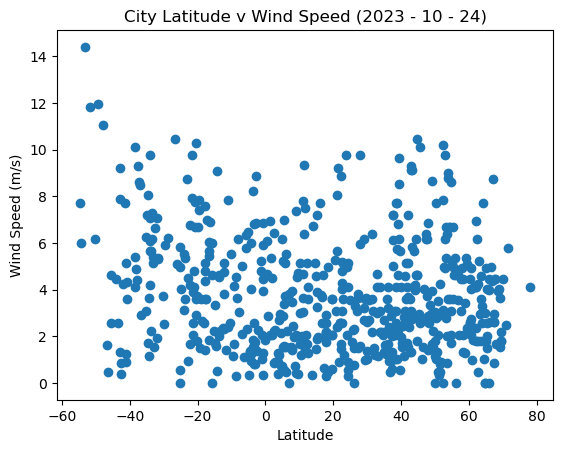

In [172]:
# Build the scatter plots for latitude vs. wind speed
fig, lat_wind = plt.subplots()
lat_wind.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
lat_wind.set_xlabel('Latitude')
lat_wind.set_ylabel('Wind Speed (m/s)')
lat_wind.set_title(f'City Latitude v Wind Speed ({ymd.tm_year} - {ymd.tm_mon} - {ymd.tm_mday})') 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [173]:
# Define a function to create Linear Regression plots
def plot_lr(hemi_df, additional):
    x = hemi_df['Lat']
    y = hemi_df[additional]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_lr = slope * x + intercept
    print(f'The r-value is: {rvalue:.4f}')

    fig, ax = plt.subplots()
    plt.scatter(x, y)
    plt.plot(x, y_lr, color = 'red')
    plt.xlabel('Lat')
    plt.ylabel(additional)
    plt.title(f'y = {slope:.4f} * x + {intercept:.4f}', color = 'red')
    plt.show()


In [174]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marka,1.7159,44.7717,26.93,88,97,5.35,SO,1698172787
1,ugoofaaru,5.6667,73.0000,27.47,78,22,3.71,MV,1698172787
2,iqaluit,63.7506,-68.5145,-0.15,80,75,3.60,CA,1698172788
3,la'ie,21.6477,-157.9253,28.92,82,9,0.89,US,1698172788
5,qaqortoq,60.7167,-46.0333,1.90,48,1,2.75,GL,1698172788


In [175]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,4.58,90,100,11.96,TF,1698172788
6,serenje,-13.2325,30.2352,24.02,38,100,2.24,ZM,1698172788
9,grytviken,-54.2811,-36.5092,1.29,93,97,6.00,GS,1698172789
10,adamstown,-25.0660,-130.1015,22.27,79,0,4.97,PN,1698172789
11,puerto baquerizo moreno,-0.9000,-89.6000,27.55,74,40,1.03,EC,1698172789


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8737


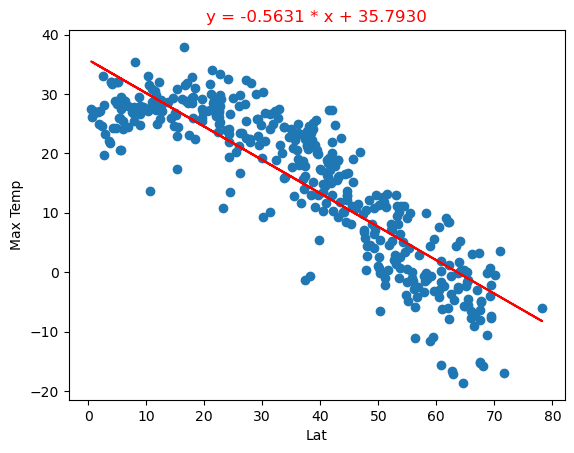

In [176]:
# Linear regression on Northern Hemisphere
plot_lr(northern_hemi_df, 'Max Temp')

The r-value is: 0.7381


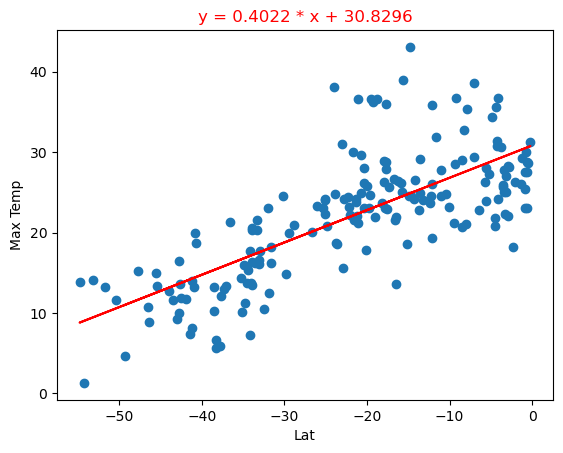

In [177]:
# Linear regression on Southern Hemisphere
plot_lr(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:**

There is a relationship between Latitude and Maximum Temperature which resembles a linear behavior by intervals, with a positive slope for negative Latitude and a negative slope for positive Latitude

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1999


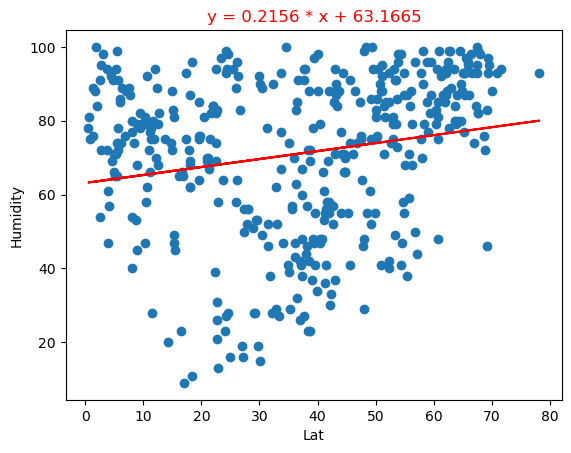

In [178]:
# Northern Hemisphere
plot_lr(northern_hemi_df, 'Humidity')

The r-value is: -0.0042


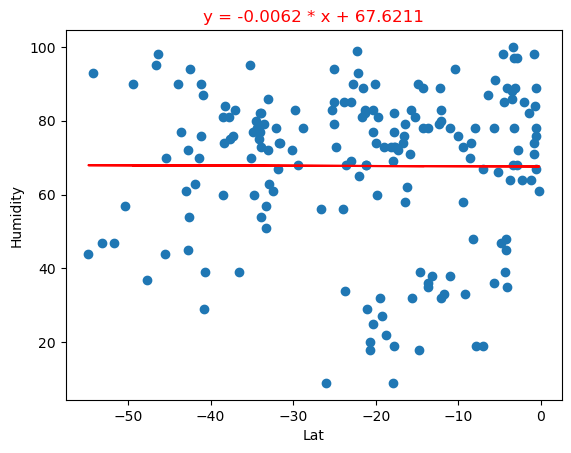

In [179]:
# Southern Hemisphere
plot_lr(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** 

The relationship between Latitude and Humidity does not show linear behavior, meaning that it cannot be accurately modeled with a linear regression model

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0391


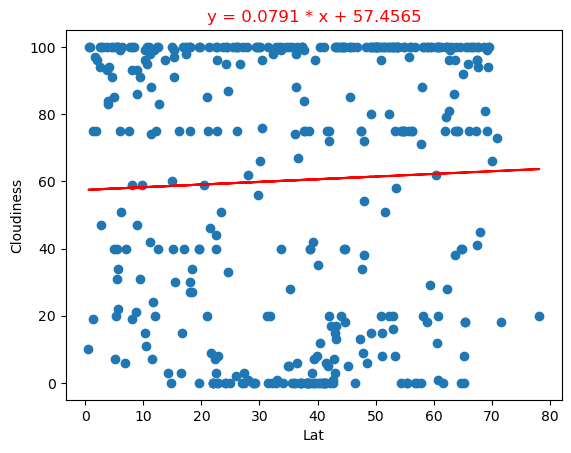

In [180]:
# Northern Hemisphere
plot_lr(northern_hemi_df, 'Cloudiness')

The r-value is: 0.3049


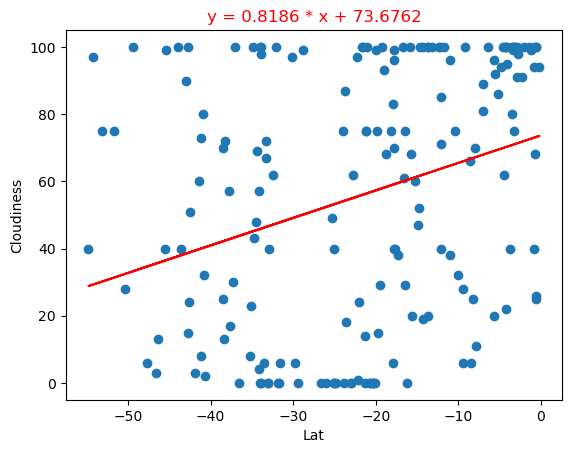

In [181]:
# Southern Hemisphere
plot_lr(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** 

The relationship between Latitude and Humidity does not show linear behavior, meaning that it cannot be accurately modeled with a linear regression model

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0796


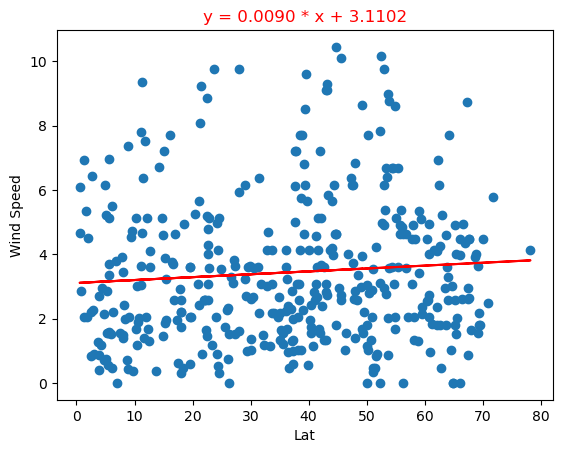

In [182]:
# Northern Hemisphere
plot_lr(northern_hemi_df, 'Wind Speed')

The r-value is: -0.3233


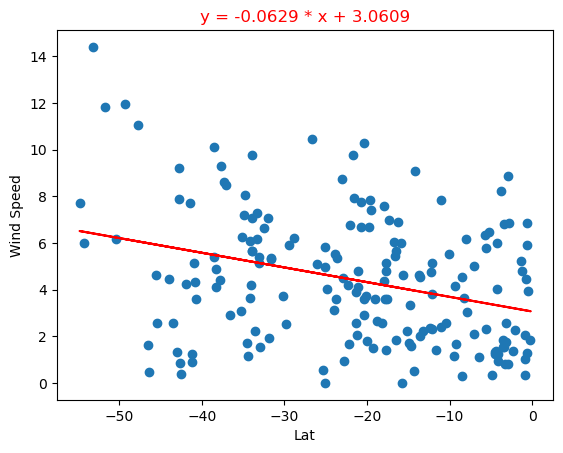

In [183]:
# Southern Hemisphere
plot_lr(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** 

The relationship between Latitude and Humidity does not show linear behavior, meaning that it cannot be accurately modeled with a linear regression model